<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Obtaining the Dataset</li>
<li>Handling missing values</li>
<li>Encoding the categorical data</li>
<li>EDA</li>
<li>Visualizations</li>
</ul>


The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/ruchi798/drug-overdose-deaths
1.  https://www.kaggle.com/rishidamarla/employee-data-from-the-city-of-chicago
2.  https://www.kaggle.com/vikasukani/loan-eligible-dataset
3.  https://www.kaggle.com/tamilsel/healthcare-providers-data
4.  https://www.kaggle.com/chirag9073/europe-economic-crisis
5.  https://www.kaggle.com/bryanb/cac40-stocks-dataset
6.  https://www.kaggle.com/christofel04/cardiovascular-study-dataset-predict-heart-disea
7.  https://www.kaggle.com/tsaustin/us-historical-stock-prices-with-earnings-data
8.  https://www.kaggle.com/kimjihoo/coronavirusdataset (Dataset: PatientInfo.csv)
9.  https://www.kaggle.com/mczielinski/bitcoin-historical-data

# <font color = 'Orange'> Read your Dataset (.csv)</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/2train.csv')
test = pd.read_csv('/content/drive/MyDrive/2test.csv')

In [ ]:
train

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
#test.head(3)
test

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,3394,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,4233,46,3.0,F,NO,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0
844,4234,58,2.0,F,NO,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0
845,4235,55,1.0,M,NO,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,NaN
846,4236,45,3.0,F,NO,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               848 non-null    int64  
 1   age              848 non-null    int64  
 2   education        830 non-null    float64
 3   sex              848 non-null    object 
 4   is_smoking       848 non-null    object 
 5   cigsPerDay       841 non-null    float64
 6   BPMeds           839 non-null    float64
 7   prevalentStroke  848 non-null    int64  
 8   prevalentHyp     848 non-null    int64  
 9   diabetes         848 non-null    int64  
 10  totChol          836 non-null    float64
 11  sysBP            848 non-null    float64
 12  diaBP            848 non-null    float64
 13  BMI              843 non-null    float64
 14  heartRate        848 non-null    float64
 15  glucose          764 non-null    float64
dtypes: float64(9), int64(5), object(2)
memory usage: 106.1+ KB


# <font color = 'Orange'> Target column/columns </font>

Write some info about the target value/values



За секој пациент треба да се предвиди дали имаат ризик од коронарна срцева болест CHD или не.  
  
Ќе се таргетираат повеќе колони од 2 различни фактори, бихејвиорални и медицински(историја и тековно).  
  
`cigsPerDay` - просек на испушени цигари на ден (continuous)    
`BPMeds`- дали пациентот земал лекови за крвен притисок или не  
`totChol` - вкупно ниво на холестерол (continuous)   
`glucose` - ниво на гликоза (continuous)   

Visualize the target column

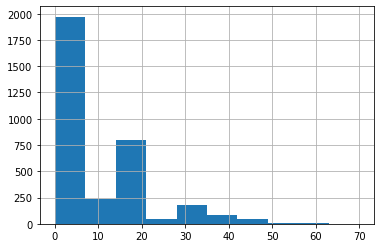

In [ ]:
train['cigsPerDay'].hist()

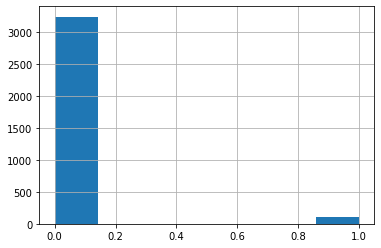

In [ ]:
train['BPMeds'].hist(bins=7)

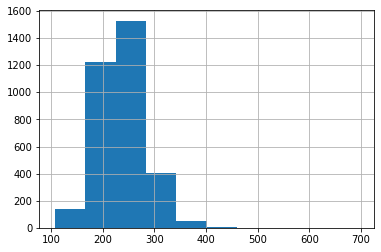

In [ ]:
train['totChol'].hist()

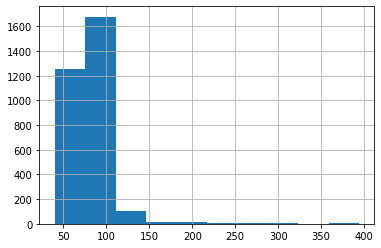

In [ ]:
train['glucose'].hist()

# <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset. 

In [ ]:
train_missing_values_count = train.isnull().sum()
train_missing_values_count

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
train_missing_values_percentage = 100 * train_missing_values_count / len(train)
train_missing_values_percentage

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

In [ ]:
train_missing = pd.concat([train_missing_values_count, train_missing_values_percentage], axis=1)
train_missing.columns = ['# of missing values', '% of missing values']
train_missing

,# of missing values,% of missing values
id,0,0.000000
age,0,0.000000
education,87,2.566372
sex,0,0.000000
is_smoking,0,0.000000
cigsPerDay,22,0.648968
BPMeds,44,1.297935
prevalentStroke,0,0.000000
prevalentHyp,0,0.000000
diabetes,0,0.000000


In [ ]:
test_missing_values_count = test.isnull().sum()
test_missing_values_count

id                  0
age                 0
education          18
sex                 0
is_smoking          0
cigsPerDay          7
BPMeds              9
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            12
sysBP               0
diaBP               0
BMI                 5
heartRate           0
glucose            84
dtype: int64

In [ ]:
test_missing_values_percentage = 100 * test_missing_values_count / len(test)
test_missing_values_percentage

id                 0.000000
age                0.000000
education          2.122642
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.825472
BPMeds             1.061321
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.415094
sysBP              0.000000
diaBP              0.000000
BMI                0.589623
heartRate          0.000000
glucose            9.905660
dtype: float64

In [ ]:
test_missing = pd.concat([test_missing_values_count, test_missing_values_percentage], axis=1)
test_missing.columns = ['# of missing values', '% of missing values']
test_missing

,# of missing values,% of missing values
id,0,0.000000
age,0,0.000000
education,18,2.122642
sex,0,0.000000
is_smoking,0,0.000000
cigsPerDay,7,0.825472
BPMeds,9,1.061321
prevalentStroke,0,0.000000
prevalentHyp,0,0.000000
diabetes,0,0.000000


Visualize the missing values using Missingno library

In [ ]:
import missingno as msno

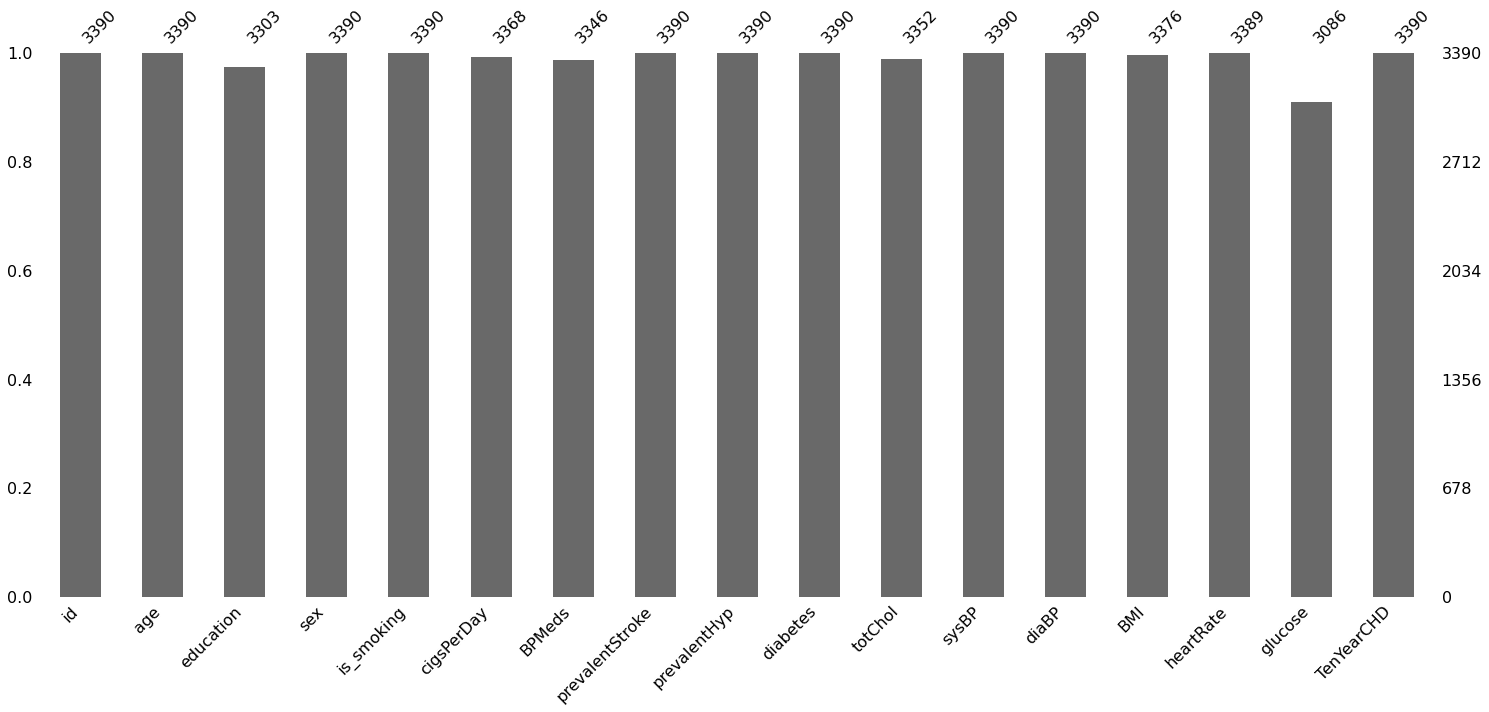

In [ ]:
msno.bar(train)

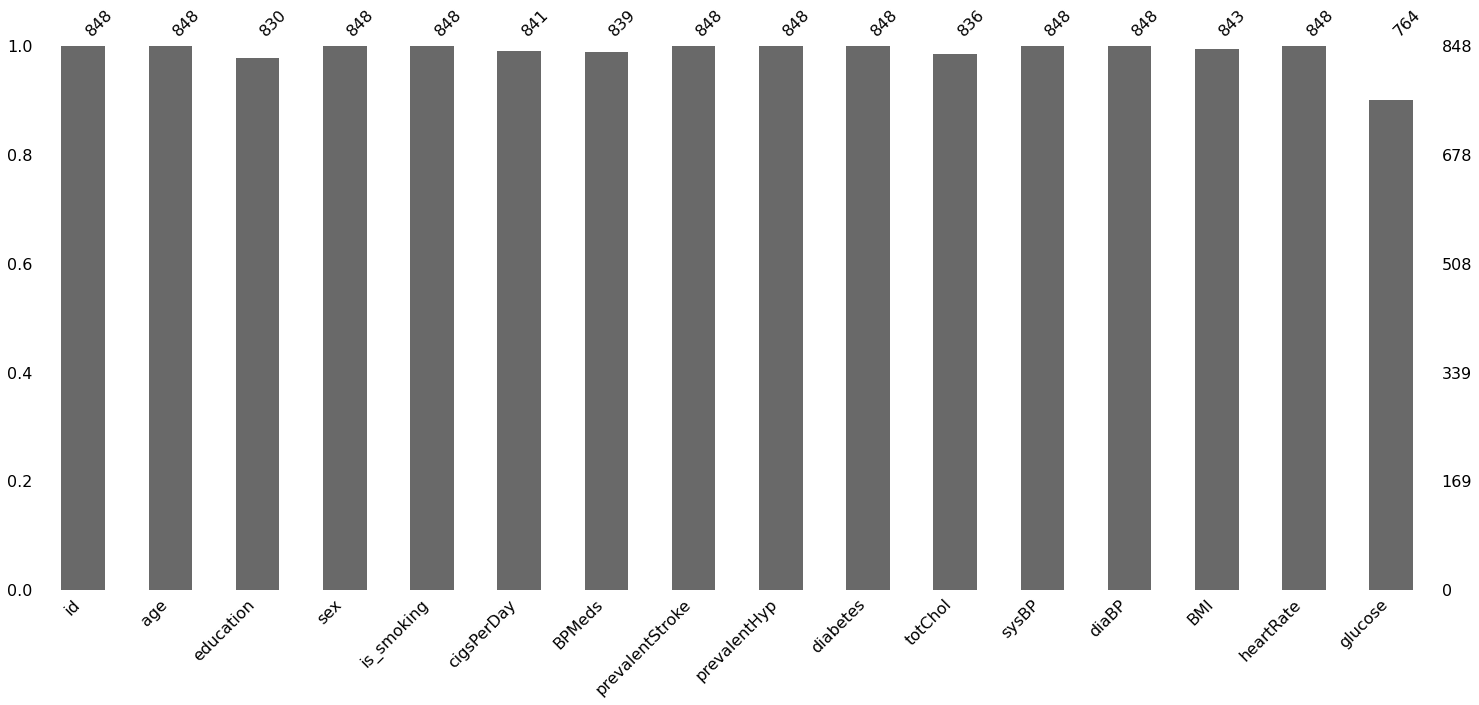

In [ ]:
msno.bar(test)

## <font color = 'Orange'> Find reasons for the missing values</font> 


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

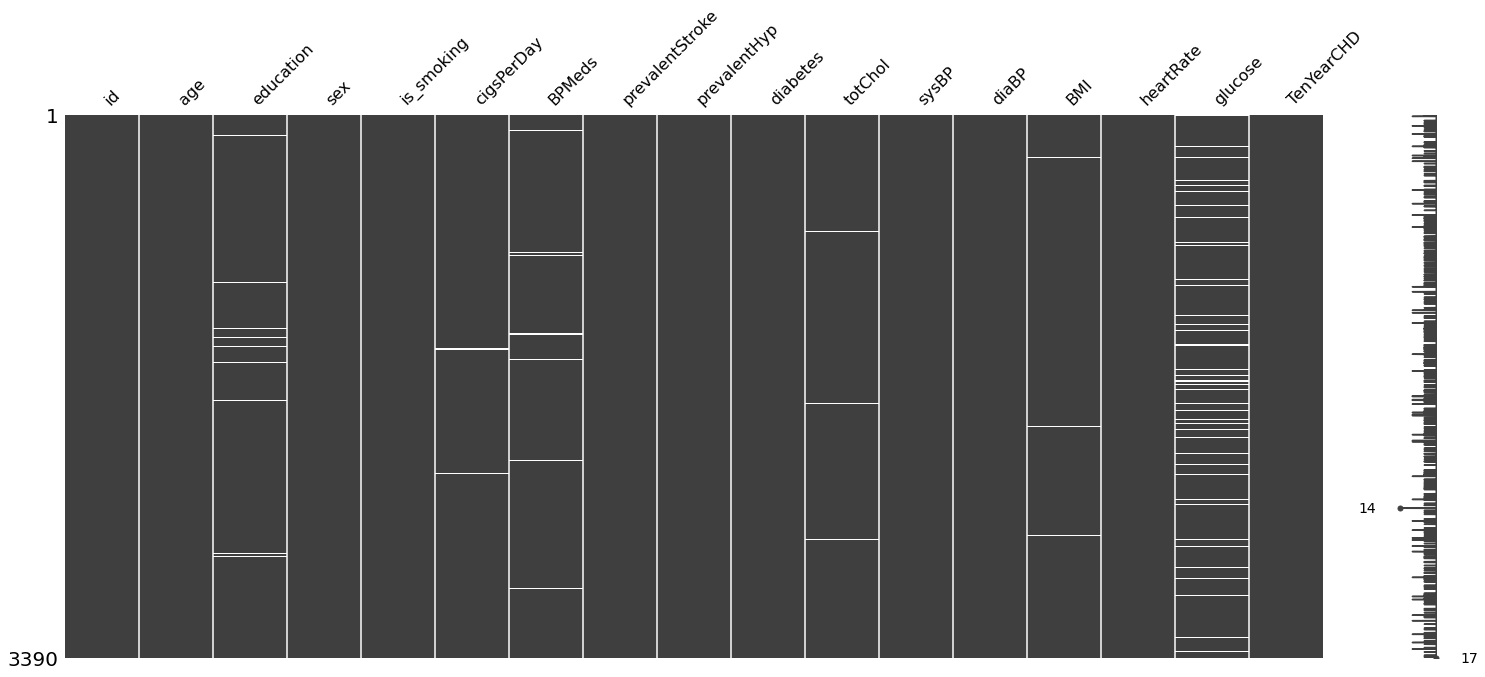

In [ ]:
msno.matrix(train)

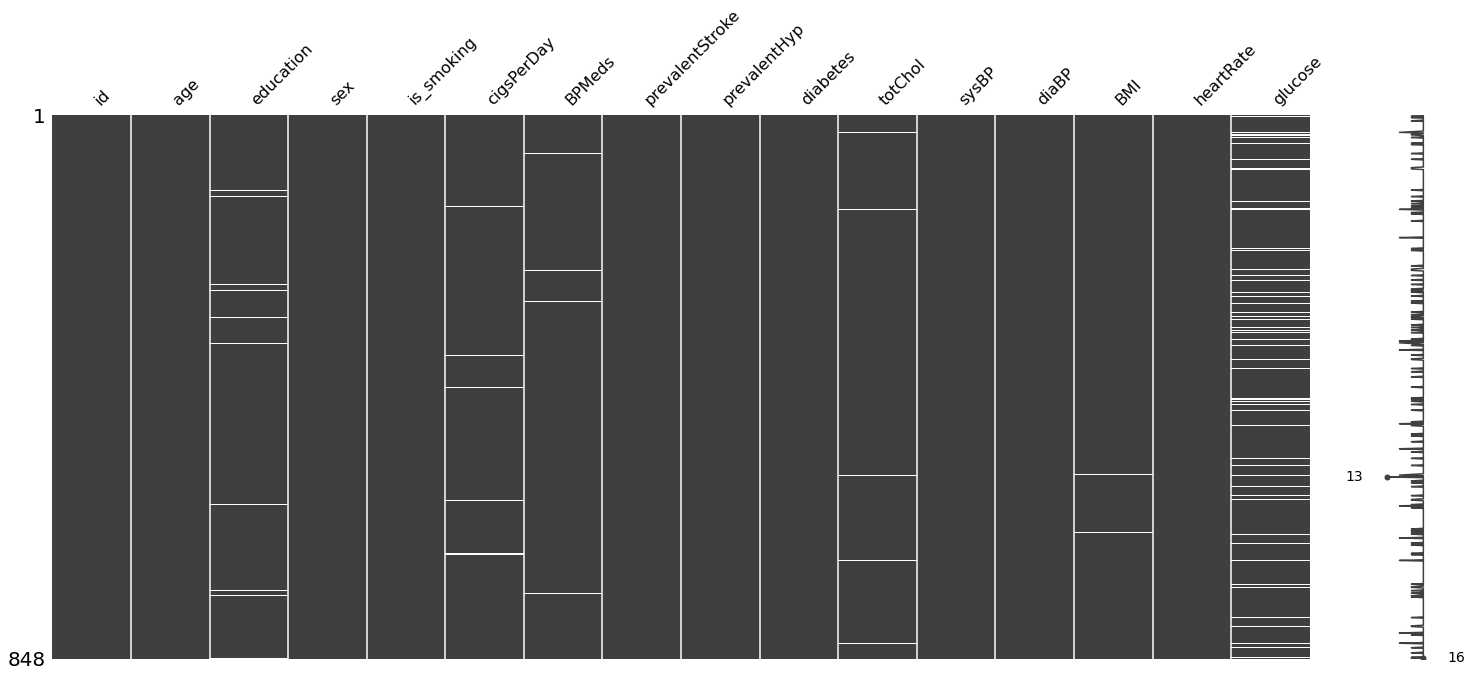

In [ ]:
msno.matrix(test)

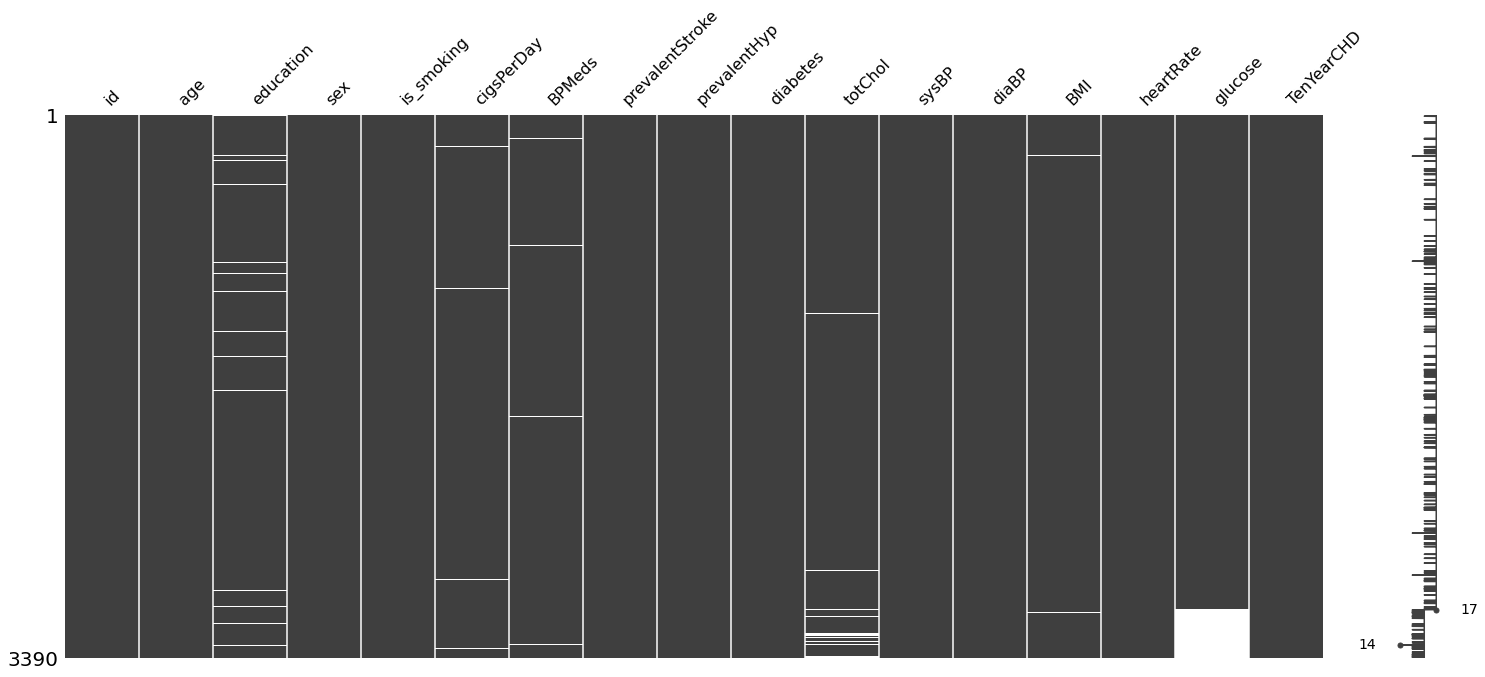

In [ ]:
msno.matrix(train.sort_values('glucose'))

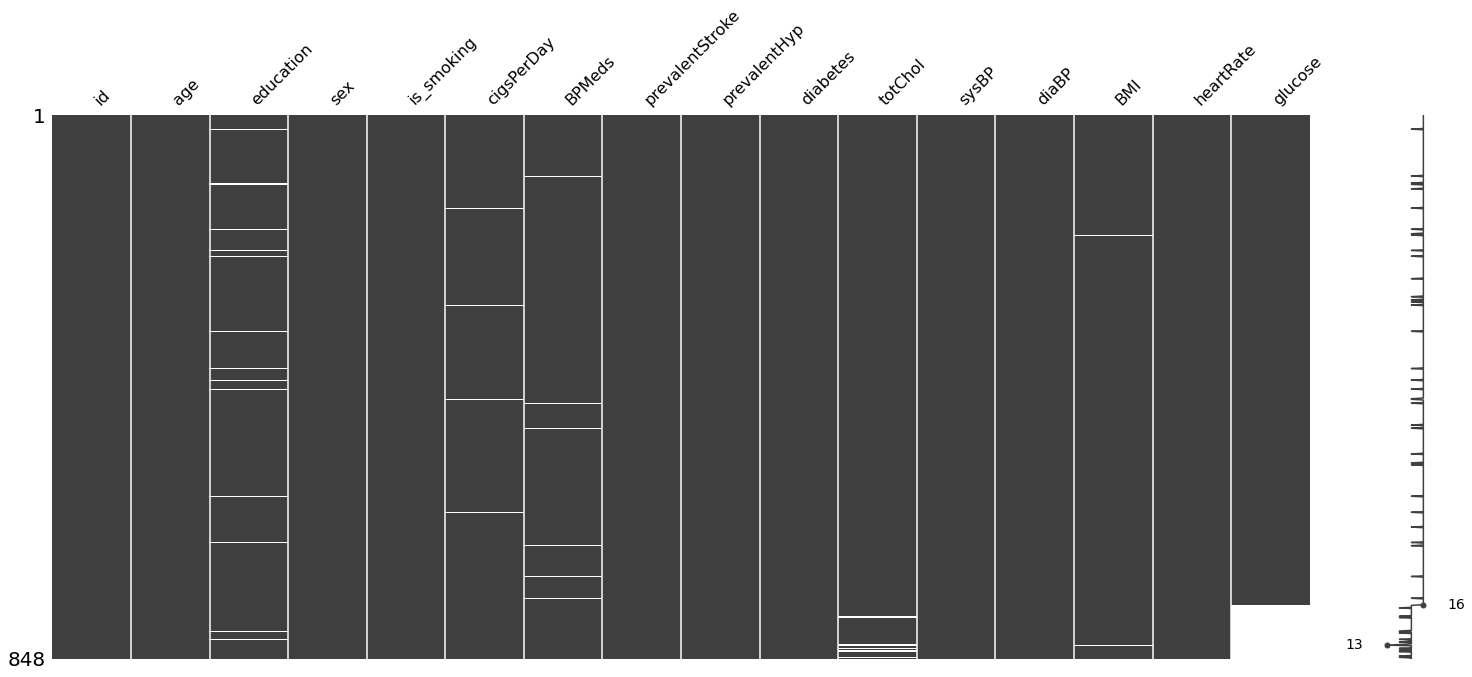

In [ ]:
msno.matrix(test.sort_values('glucose'))

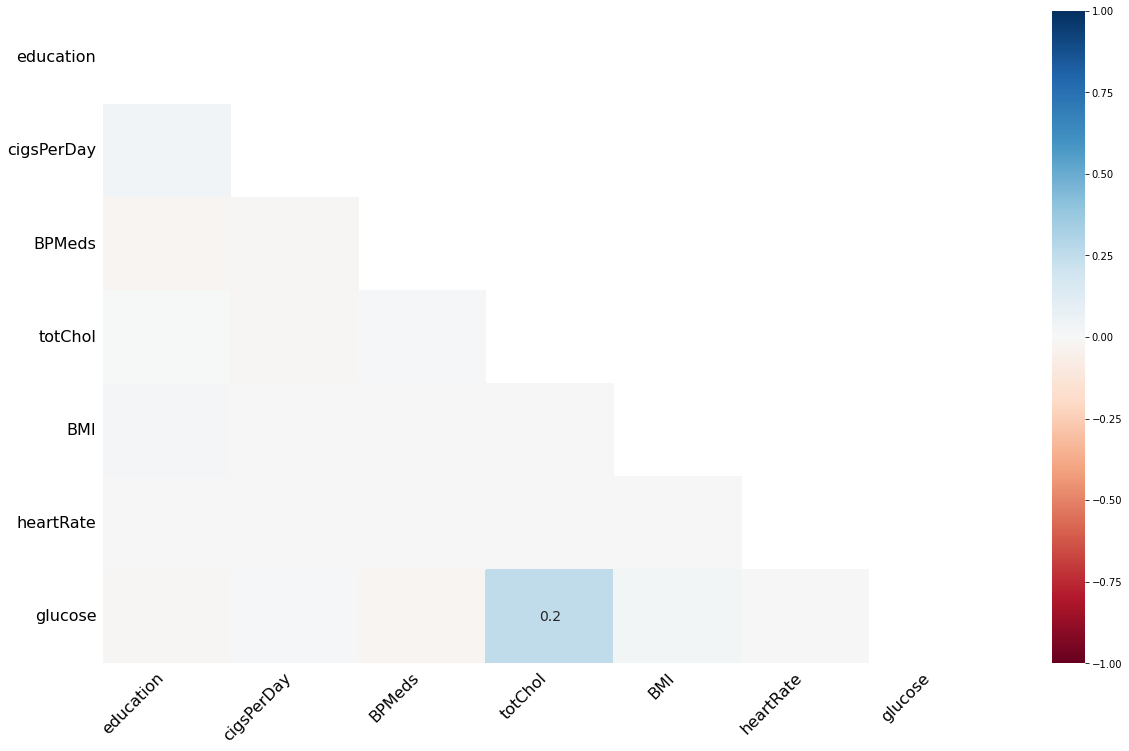

In [ ]:
msno.heatmap(train)

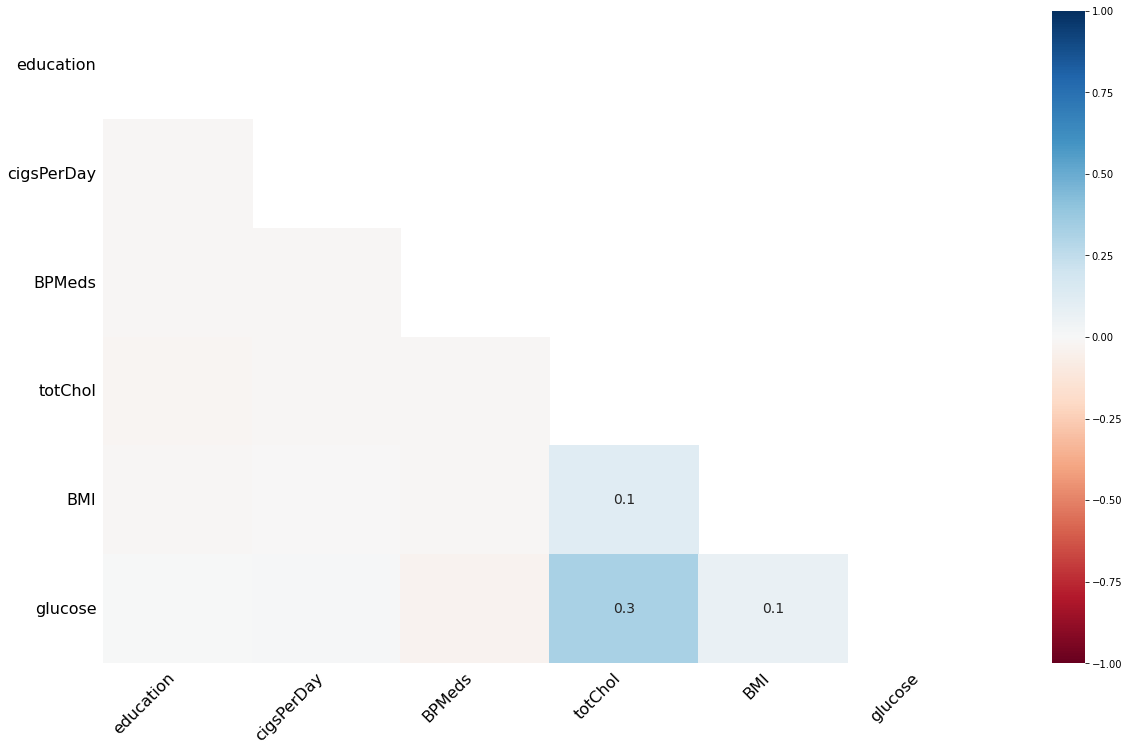

In [ ]:
msno.heatmap(test)

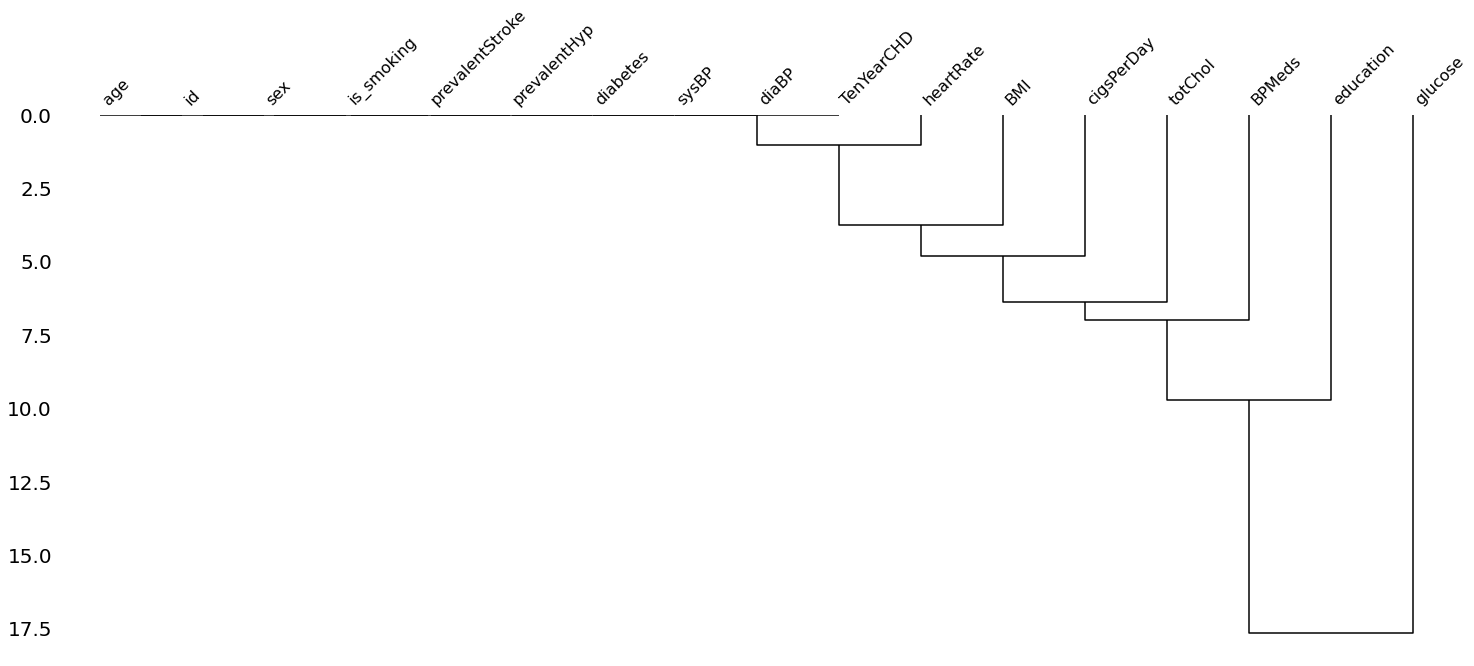

In [ ]:
msno.dendrogram(train)

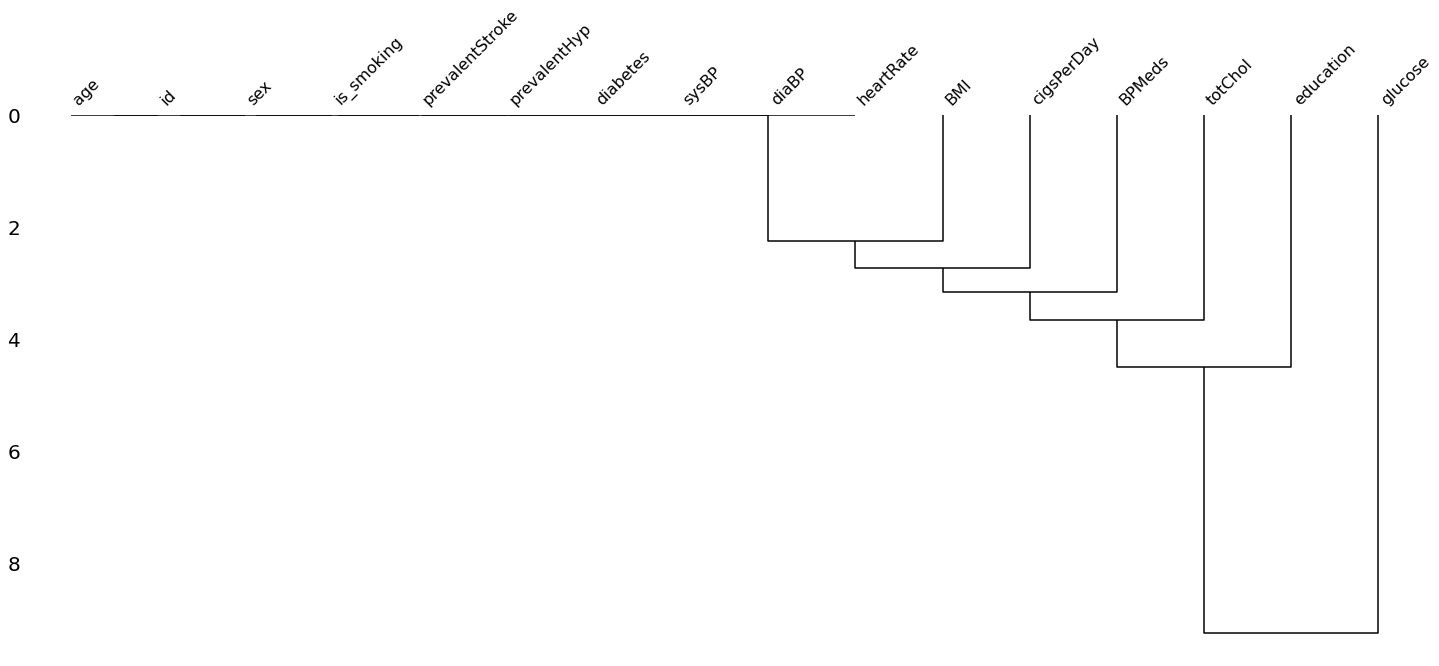

In [ ]:
msno.dendrogram(test)

Write the reasons for the missing values

Не се детектирани премногу значителни корелации помеѓу колоните, се движат од 0.1 до 0.3 помеѓу `glucose`, `totChol` и `BMI`.  
  
Мала зависност има помеѓу `glucose` со `BMI` и `BMI` со `totChol` (0.1) и `glucose` со `totChol` - 0.3 во test податочното множество, а во train податочното множество 0.2 зависност помеѓу `glucose` и `totChol`.   
Ниските корелации ни укажуваат дека податоците се MAR.
  
Помеѓу останатите колони нема зависност.

Target колоната со најголем број на вредности кои недостигаат е `glucose` и колоните кои имаат некаква корелација со неа се `totChol` и `BMI`.

## <font color = 'Orange'>Handle the missing values</font>

After you observed the data, the main goal is to know how the columns depend one to another. Therefore, the next step is to select one of the techniques of Machine Learning: Linear Regression, KNN Classification or Logistic Regression that you will use for handling the missing values. You don't need to use the whole dataset for detecting the missing values in one column, you can use a subset of columns that are making the prediction of the target missing value. 


In [ ]:
train_knn = train.copy(deep=True)

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
train_knn['glucose']=scaler.fit_transform(train_knn['glucose'].to_numpy().reshape(-1, 1) )

In [ ]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
train_knn['glucose'] = knn_imputer.fit_transform(train_knn[['glucose']])

In [ ]:
train_knn['glucose'].isnull().sum()

0

In [ ]:
 train_knn['glucose']

0       0.112994
1       0.098870
2       0.152542
3       0.152542
4       0.104520
          ...   
3385    0.177966
3386    0.124294
3387    0.090395
3388    0.127119
3389    0.146893
Name: glucose, Length: 3390, dtype: float64

# <font color = 'Orange'> Encode non numerical values </font> 

If this is still not passed on the classes just erase these columns

In [ ]:
train.head(2)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0


In [ ]:
train['sex'].value_counts()

F    1923
M    1467
Name: sex, dtype: int64

In [ ]:
train['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder 

In [ ]:
le = LabelEncoder() 
train['sex']= le.fit_transform(train['sex']) 
train['is_smoking']= le.fit_transform(train['is_smoking']) 
train

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,1,0,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


# <font color = 'Orange'>Save the new Dataset(.csv) </font>

In [ ]:
train.to_csv('/content/drive/MyDrive/2new_train.csv', index=False)

Print the first rows of your final Dataset

In [ ]:
new_train = pd.read_csv('/content/drive/MyDrive/2new_train.csv')
new_train.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


#<font color='orange'>EDA</font>

## <font color='Orange'>Find statistic elements for the continuous variables</font>
Like mean, median,  standard deviation, minimum, maximum, quantile, geometric mean

Continuous variables: `cigsPerDay`, `totChol`, `sysBP`, `diaBP`, `BMI` and `glucose`  

In [ ]:
train[["cigsPerDay","totChol","sysBP","diaBP","BMI","glucose"]].describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0
diaBP,3390.0,82.883038,12.023581,48.00,74.50,82.00,90.00,142.5
BMI,3376.0,25.794964,4.115449,15.96,23.02,25.38,28.04,56.8
glucose,3086.0,82.086520,24.244753,40.00,71.00,78.00,87.00,394.0


In [ ]:
train[["cigsPerDay","totChol","sysBP","diaBP","BMI","glucose"]].median()

cigsPerDay      0.00
totChol       234.00
sysBP         128.50
diaBP          82.00
BMI            25.38
glucose        78.00
dtype: float64

In [ ]:
import numpy as np
def g_mean(x):
    a = np.log(x)
    return np.exp(a.mean())

In [ ]:
g_mean([train['sysBP']])

130.88346892531823

In [ ]:
g_mean([train['diaBP']])

82.04301383507003

In [ ]:
from scipy import stats

stats.gmean(train.iloc[:,12:13],axis=0)

array([82.04301384])

## <font color = 'Orange'>Find the frequencies for the categorical variables </font>

In [ ]:
train[["sex","is_smoking"]].value_counts()

sex  is_smoking
0    0             1147
1    1              911
0    1              776
1    0              556
dtype: int64

# <font color = 'Orange'>Data visualization </font>

## <font color = 'Orange'>Find the distribution of given attributes</font>


Which of the attributes(columns) did you choose?


`cigsPerDay`, `BMI`, `totChol` and `glucose`

**Make the visualizations using histograms, bar charts, etc.**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(train, nGraphShown, nGraphPerRow):
    nunique = train.nunique()
    train = train[[col for col in train if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = train.shape
    columnNames = list(train)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnTrain = train.iloc[:, i]
        if (not np.issubdtype(type(columnTrain.iloc[0]), np.number)):
            valueCounts = columnTrain.value_counts()
            valueCounts.plot.bar()
        else:
            columnTrain.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

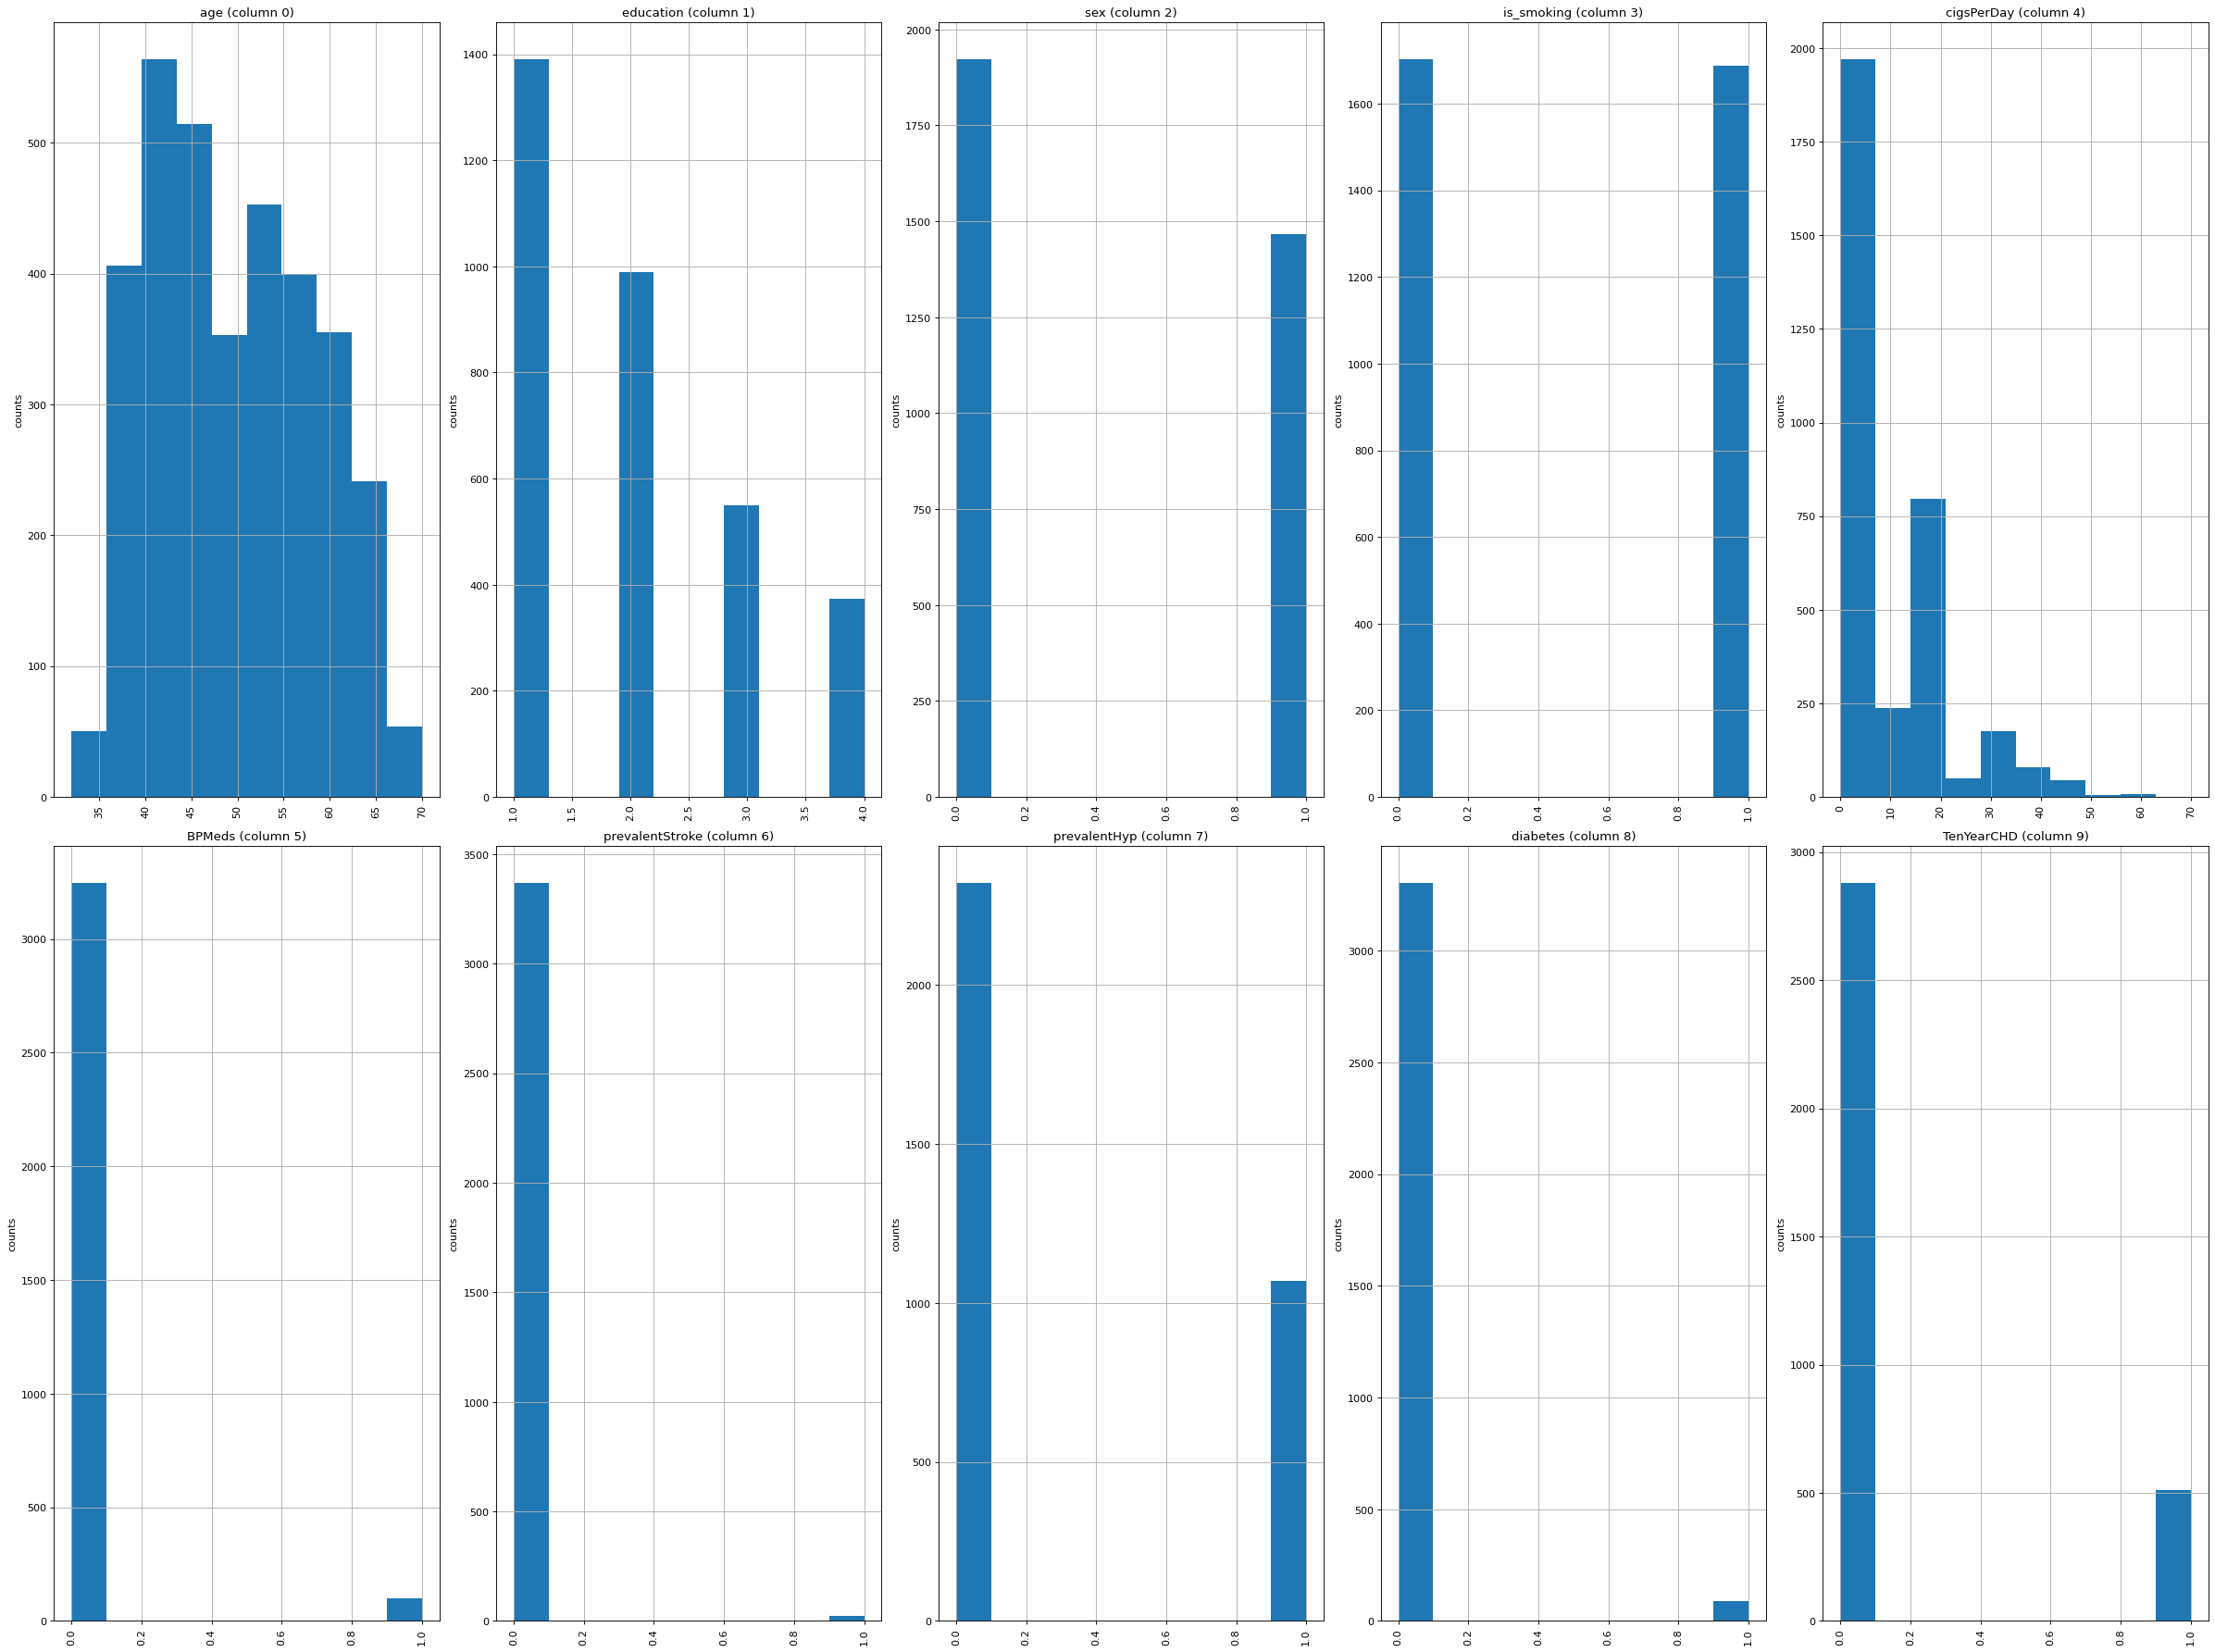

In [ ]:
plotPerColumnDistribution(train, 10, 5)

<Figure size 432x288 with 0 Axes>

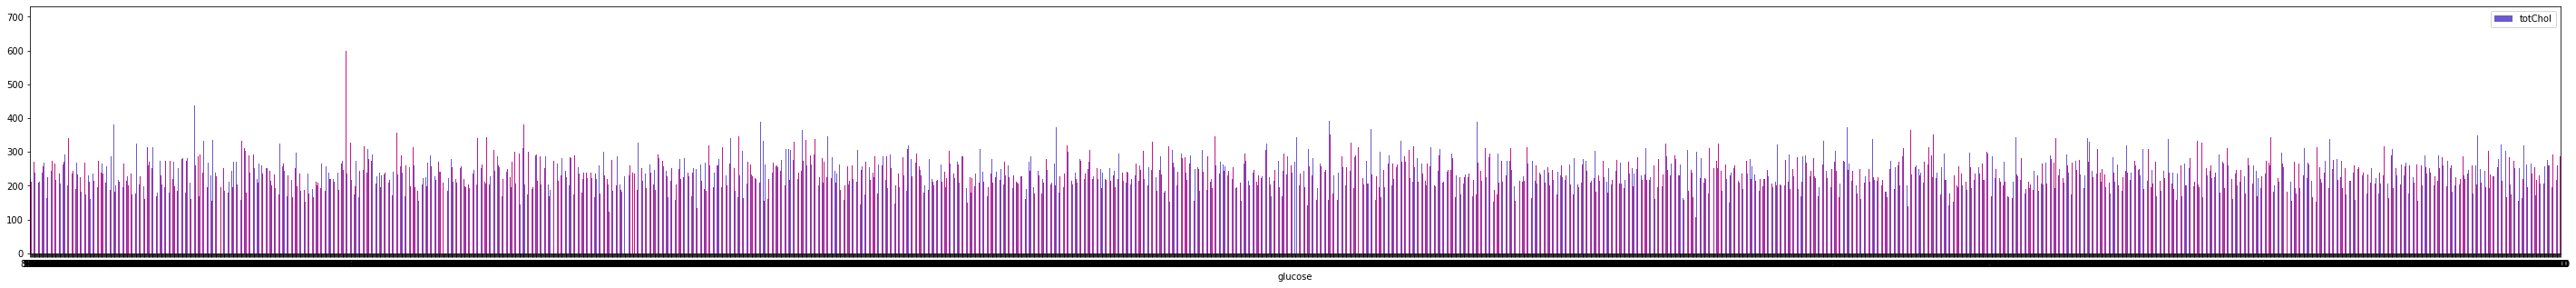

In [ ]:
fig = plt.figure()
train.plot.bar(x='glucose', y='totChol', rot=0, figsize=(50,5), color=['slateblue', 'mediumvioletred'])
fig.show()

## <font color = 'Orange'>Visualize the relationship between the attributes</font>

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 10 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

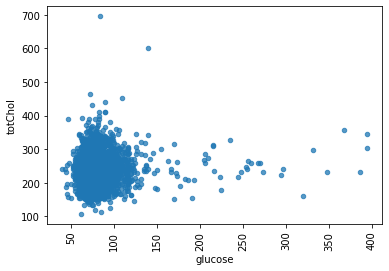

In [ ]:
fig = plt.figure()
train.plot.scatter(x= 'glucose', y = 'totChol', alpha = 0.75,rot=0)
plt.xticks(rotation=90)

(array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.]),
 <a list of 11 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

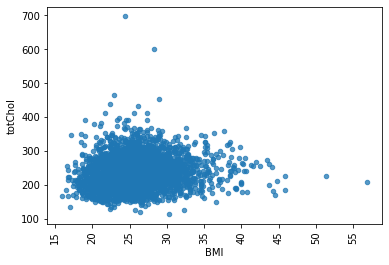

In [ ]:
fig = plt.figure()
train.plot.scatter(x= 'BMI', y = 'totChol', alpha = 0.75,rot=0)
plt.xticks(rotation=90)

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 10 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

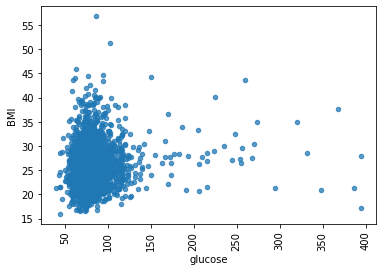

In [ ]:
fig = plt.figure()
train.plot.scatter(x= 'glucose', y = 'BMI', alpha = 0.75,rot=0)
plt.xticks(rotation=90)

## <font color = 'Orange'>Make comparison of the columns</font>

Using multiple histograms, box-plots, scatter plots, pairplots, etc.


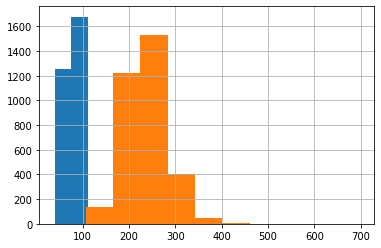

In [ ]:
train['glucose'].hist()
train['totChol'].hist()

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

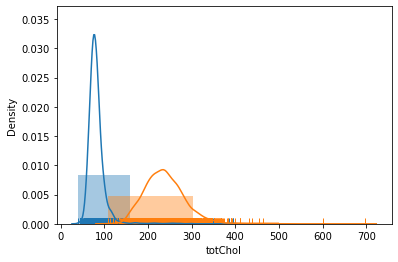

In [ ]:
line_up=sns.distplot(train['glucose'], bins=3, kde=True, rug=True, label='glucose')

line_down=sns.distplot(train['totChol'], bins=3, kde=True, rug=True, label='totChol')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

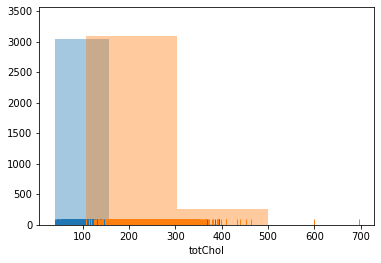

In [ ]:
line_up=sns.distplot(train['glucose'], bins=3, kde=False, rug=True,label='glucose')

line_down=sns.distplot(train['totChol'], bins=3, kde=False, rug=True,label = 'totChol')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


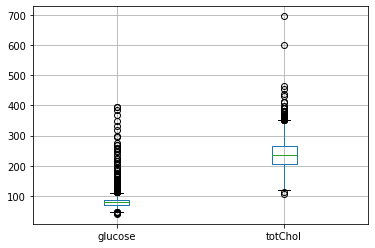

In [ ]:
boxplot = train.boxplot(column=['glucose', 'totChol'])

# <font color = 'Orange'>EXTRA: Complex visualizations</font> 
For this you will need a basic knowledge of the Plotly library: https://plotly.com/graphing-libraries/
and for deploying the visualization as a web app you will need the Dash library for that take a look of: https://github.com/plotly/dash

